
# Homework #8

## Long-Term Capital Management, L.P. (A) [HBS 9-200-007]

### 1 Conceptual Issues for LTCM

Discuss these questions briefly, based on the info in the case. No need to quantitatively answer these questions.

1. Describe LTCM’s investment strategy with regard to the following aspects:

    - Securities traded

    <span style="color:red;">

    * Fixed-Income Swaps and Government Bonds (Swap Spread Trade)
    * Fixed-Rate Residential Mortgages
    * Long-maturity put and call options (selling volatility trade)
    * Equities (Risk Arbitrage and equity relative value trades)

    </span>

    - Trading frequency

    <span style="color:red;">

    Longer time-horizons (6-months to 2 years or more).

    </span>

    - Skewness (Do they seek many small wins or a few big hits?)

    <span style="color:red;">

    The seek many small wins. Take, for example, the swap-spread trade example. This trade resulted in repeatable small wins, but the returns were magnified by the fund's leverage (which was 19:1)

    </span>

    - Forecasting (What is behind their selection of trades?)

    <span style="color:red;">

    Much of their investment selection was based on known relationships between fixed-income instruments. They would place trades with the expectation that these relationships would persist into the future, exploiting the auto-correlation of interest rates or exchange rates. 
    
    For their equity strategies, they avoided many events that had high uncertainty, focusing instead on trades that afforded little excess value. They magnified the returns on these spreads by levering up their positions using total-return swaps.

    </span>

2. What are LTCM’s biggest advantages over its competitors?

    <span style="color:red;">

    LTCM's greatest advantage lied in their access to capital markets. They were able to finance trades at very favorable rates that allowed them to lever up their positions significantly, and take advantage of some trades that would only be profitable due to the financing rates they could realize. They gained this advantage due to the following features of their trading strategies:
    1. **Fund Size:** The size of LTCM's fund supported their efficient financing advantage. Because they were large relative to many of their competitors, they were able to command more favorable rates in their financing arrangements.
    2. **Collateralization:** LTCM often collateralized their positions to obtain lower haircuts.
    3. **Long-Term Horizon (Equity Capital):** LTCM could effectively manage their liquidity because investment in their fund was subject to long-horizon lockups. This meant they did not have to worry about investors pulling cash out of the fund during periods of adverse market movements.
    4. **Hedging & Risk Management:** Many of LTCM's strategies were hedged strategies, which means they exposed themselves to a limited amount of risk. 

    </span>

3. The case discusses four types of funding risk facing LTCM and ways in which LTCM manages each of these risks. Briefly discuss them:

    - Collateral haircuts

    <span style="color:red;">

    The haircuts increase in a market disruption event leading to unfavorable collateral terms for LTCM in terms of funding a spread trade. For most trades, LTCM obtains 100% financing on a fully collateralized basis.

    </span>

    - Repo maturity

    <span style="color:red;">

    In an adverse situation, where their credit risk goes up, LTCM won't be able to secure these longer terms repos, which were favorable to their trades. LTCM goes against the norm by entering into relatively long-maturity repos (6-12 months vs. overnight). 

    </span>

    - Equity redemption

    <span style="color:red;">

    In an adverse trading environment, many funds would be at risk of investors withdrawing funds. LTCM, however, initially made investments in their fund subject to a 3-year lockup period to manage this equity redemption funding risk. This was later modified to a staggered redemption schedule where investors could redeem up to a third of their capital in each of years 2, 3, and 4 of their investment. However, any unredeemed capital was considered a "new" investment and went back to the beginning of the lockup schedule. In this way, LTCM better secured their equity financing and limited the potential for exacerbation of trading losses due to unfavorable redemptions in adverse trading environments.

    </span>

    - Loan access

    <span style="color:red;">

    The fund had negotiated a total of $930 million in loan financing across two types of facilities:

    * $230 million of unsecured term loans with maturities of ~3 years
    * $700 million unsecured revolving line of credit from a lending syndicate of 25 commercial banks

    The \$700 million revolver was particularly noteworthy because LTCM was able to obtain this financing without covenants subject to discretionary interpretation by the lenders, such as a Material Adverse Change clause. Instead, the aggreement provided that the fund could not have any of the facility draw if the fund's NAV fell $\geq$ 50% or more during the calendar year.

    </span>

    

4. LTCM is largely in the business of selling liquidity and volatility. Describe how LTCM accounts for liquidity risk in their quantitative measurements.

    <span style="color:red;">

    LTCM required their trading counterparties to maintain a collateral balance via daily marking-to-market and settlement. Thus, the cash flow coming from these daily settlements fund LTCM's outgoing cash flows coming from offsetting positions.

    They also estimated theoretical worst case haircuts that could be realized in adverse market environments. Forecasting these worst case liquidity events allowed them to better structure their financing so as not to liquidate its positions when the market would move against their positions.

    For day-to-day risk management, LTCM accounts for liquidity risk by adjusting security correlations. Over short-term horizons, they assume positive correlations between all trade categories.

    </span>

5. Is leverage risk currently a concern for LTCM?

    <span style="color:red;">

    At the time of the case, leverage was not a major risk being managed (as evidenced by their 19:1 leverage ratio). However, it was obviously a threat to their operations in hindsight.

    </span>

6. Many strategies of LTCM rely on converging spreads. LTCM feels that these are almost win/win situations because of the fact that if the spread converges, they make money. If it diverges, the trade becomes even more attractive, as convergence is still expected at a future date. *What is the risk in these convergence trades*?

    <span style="color:red;">

    The risk in these convergence trades is that convergence is not realized. Importantly, this is not a zero-probability event, rather it is a low probability event. Consequently, LTCM exposed itself signficantly to tail risk, and wasn't managing extreme tail risk. Thus, when a generational market event (like the rapid depreciation of the Russian Ruble) that LTCM has exposure to is realized, their losses from non-convergence are amplified 19x. Such a generational market event was, ultimately, LTCM's undoing.

    </span>

---



In [2]:
import pandas as pd
from datetime import timedelta
import numpy as np
from functools import partial

from scipy.stats import norm, chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
sys.path.insert(0, parent_dir)
sys.path.insert(0, grandparent_dir)
import cmds.portfolio_management_helper as pmh

plt.style.use("seaborn-v0_8-whitegrid")
PLOT_WIDTH, PLOT_HEIGHT = 8, 5
COLORS = ["blue", "red", "orange"]

warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.4f}".format
p = plt.rcParams

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 2 LTCM Risk Decomposition

- On Canvas, find the data file, `ltcm_exhibits_data.xlsx`. Get the gross and net (total) returns of LTCM from “Exhibit 2”.
- Get the returns on SPY as well as the risk-free rate from the file, `gmo_analysis_data`.

In [3]:
DATA_PATH = parent_dir + '/data/'
GMO_FILE = DATA_PATH + 'gmo_analysis_data.xlsx'
LTCM_FILE = DATA_PATH + 'ltcm_exhibits_data.xlsx'
rets_spy = pmh.read_excel_default(GMO_FILE, 
                                 sheet_name='total returns',
                                 index_col='date', parse_dates=True).loc[:, 'SPY'].to_frame('SPY')
rets_spy = rets_spy.iloc[:-1]  # remove the last row
rets_rf = pmh.read_excel_default(GMO_FILE, 
                                 sheet_name='risk-free rate',
                                 index_col='date', parse_dates=True)
rets_rf /= 12   # risk-free returns are originally provided on annualized basis
rets_ltcm = pmh.read_excel_default(LTCM_FILE, 
                                 sheet_name='Exhibit 2',
                                 index_col=0, parse_dates=True,
                                 header=2).dropna().iloc[:, 1:3]
rets_ltcm.columns = ['gross_ret', 'net_ret']

# Align the LTCM dates index with the RF and SPY dates indices
rets_ltcm.index = rets_rf.loc['1994-03':'1998-07'].index

### 2.1. **Summary Stats.**

(a) For both the gross and net series of LTCM excess returns, report the mean, volatility, and Sharpe ratios. (Annualize them.)

(b) Report the skewness, kurtosis, and (historic) VaR(.05).

(c) Comment on how these stats compare to SPY and other assets we have seen. How much do they differ between gross and net?

In [4]:
xs_rets_ltcm = rets_ltcm - rets_rf.loc[rets_ltcm.index].values
xs_rets_spy = rets_spy - rets_rf.loc[rets_spy.index].values

compare_df = pd.concat([xs_rets_ltcm, xs_rets_spy.loc[xs_rets_ltcm.index]], axis=1)
pmh.calc_summary_statistics(compare_df, annual_factor=12, provided_excess_returns=True,
                            keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe',
                                          'Skewness', 'Kurtosis', 'Historical VaR']).T.style.format("{:.2%}")

,gross_ret,net_ret,SPY
Annualized Mean,24.33%,15.66%,17.52%
Annualized Vol,13.63%,11.18%,11.27%
Annualized Sharpe,178.58%,140.09%,155.51%
Skewness,-28.97%,-81.17%,-43.25%
Excess Kurtosis,158.00%,291.72%,-35.87%
Historical VaR (5.00%),-3.04%,-2.64%,-4.66%
Annualized Historical VaR (5.00%),-10.52%,-9.14%,-16.16%


<span style="color:red;">

These performance stats are impressive. On a gross basis, LTCM was returning considerably more than SPY, and with little more risk.

* The Sharpe ratio of 1.79 is unmatched across all other return series we've analyzed. 
* The smaller negative skewness of the gross returns suggests there is a relatively fewer big positive return periods
* The high excess kurtosis suggests that the distribution of returns have much fatter tails
* Despite the heavy tails, the historical VaR is substantially better than SPY

Out of curiosity, I also assess the max drawdown profiles below. Here, the LTCM fund shows significantly more tail risk than SPY.

</span>

In [5]:
pmh.calc_summary_statistics(compare_df, annual_factor=12, provided_excess_returns=True,
                            keep_columns=['Max Drawdown', 'Peak', 'Bottom', 'Recovery', 'Duration']).T

,gross_ret,net_ret,SPY
Max Drawdown,-0.1688,-0.1754,-0.0559
Peak,1998-04-30 00:00:00,1997-12-31 00:00:00,1997-07-31 00:00:00
Bottom,1998-06-30 00:00:00,1998-07-31 00:00:00,1997-08-29 00:00:00
Recovery,NaT,NaT,1997-12-31 00:00:00
Duration (days),NaN,NaN,124.0000


### 2.2. Using the series of net LTCM excess returns, denoted $\tilde{r}_{LTCM}$, estimate the following regression:

$$\tilde{r}_{LTCM_t} = \alpha + \beta_m \tilde{r}_{m_t} + \epsilon_t$$

(a) Report $\alpha$ and $\beta_m$. Report the $R^2$ stat.

(b) From this regression, does LTCM appear to be a “closet indexer”?

(c) From the regression, does LTCM appear to deliver excess returns beyond the risk premium we expect from market exposure?


In [6]:
pmh.calc_regression(xs_rets_ltcm.loc[:, 'gross_ret'].to_frame('LTCM Market TS Regression Stats'), xs_rets_spy.loc[xs_rets_ltcm.index, ['SPY']], 
                    annual_factor=12, warnings=False,
                    keep_columns=['Annualized Alpha', 'SPY Beta', 'R-Squared']).T

,LTCM Market TS Regression Stats
Annualized Alpha,0.2119
R-Squared,0.0221
SPY Beta,0.1797


<span style="color:red;">

**(b)** No, LTCM does not appear to be a "closet indexer." The $R^2$ stat is very low in this regression, and most of the excess returns for the LTCM are explained by the Alpha of this regression. This is evidenced by the large Alpha and the small size of the market Beta. This means that the LTCM fund's returns don't move much in response to changes in Market returns.

**(c)** Yes, LTCM does appear to deliver excess returns beyond the risk premium we expect from market exposure. Recall that, in a univariate regression, $R^2$ is given by
$$R^2 = [corr(\tilde{r}_{LTCM}, \tilde{r}_m)]^2$$
Consequently, these regression stats tell us that $corr(\tilde{r}_{LTCM}, \tilde{r}_m) \approx 0.145$. Therefore, not only does the LTCM fund appear to deliver excess returns beyond the risk premium we expect from market exposure, but allocations to this fund would provide significant diversification benefits to a portfolio with allocations to the market.

</span>

### 2.3. Let’s check for non-linear market exposure. Run the following regression on LTCM’s net excess returns:

$$\tilde{r}_{LTCM_t} = \alpha + \beta_1 \tilde{r}_{m_t} + \beta_2 (\tilde{r}_{m_t})^2 + \epsilon_t$$

(a) Report $\beta_1$, $\beta_2$, and the $R^2$ stat.

(b) Does the quadratic market factor do much to increase the overall LTCM variation explained by the market?

(c) From the regression evidence, does LTCM’s market exposure behave as if it is long market options or short market options?

(d) Should we describe LTCM as being positively or negatively exposed to market volatility?



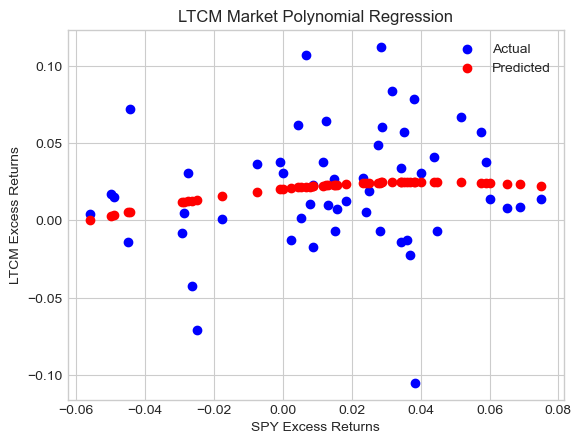

In [7]:
spy_input = xs_rets_spy.loc[xs_rets_ltcm.index, ['SPY']]
ltcm_input = xs_rets_ltcm.loc[:, ['gross_ret']]
poly = PolynomialFeatures(degree=2)
spy_poly = poly.fit_transform(spy_input)

model = LinearRegression()
model.fit(spy_poly, xs_rets_ltcm.loc[:, ['gross_ret']])

ltcm_pred = model.predict(spy_poly)

# Plot the results
plt.scatter(spy_input, ltcm_input, color='blue')
plt.scatter(spy_input, ltcm_pred, color='red')
plt.title('LTCM Market Polynomial Regression')
plt.xlabel('SPY Excess Returns')
plt.ylabel('LTCM Excess Returns')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [8]:
#(a)
xs_rets_spy['SPY_Squared'] = xs_rets_spy.loc[:, ['SPY']] ** 2
pmh.calc_regression(xs_rets_ltcm.loc[:, 'gross_ret'].to_frame('LTCM Market Polynomial Regression Stats'), xs_rets_spy.loc[xs_rets_ltcm.index], 
                    annual_factor=12, warnings=False,
                    keep_columns=['Annualized Alpha', 'SPY Beta', 'SPY_Squared Beta', 'R-Squared']).T

,LTCM Market Polynomial Regression Stats
Annualized Alpha,0.2436
R-Squared,0.0287
SPY Beta,0.2202
SPY_Squared Beta,-2.5887


<span style="color:red;">

**(b)** No, the quadratic market factor does not do much to increase the overall LTCM variation explained by the market. This is evidenced by the $R^2$ in this polynomial regression being near the same as the original linear regression. 

It's worth pointing out that the beta for the squared SPY returns is large and negative. However, this simply a feature of the factor. The squared monthly returns are considerably smaller than the monthly returns. Thus, the beta has to be substantially larger in magnitude to fit these small squared returns proportionally.

**(c)** Since the beta to SPY-squared returns is negative, LTCM's market exposure behaves as if it were short the market options. The beta to SPY can be interpreted as the delta of the market option and the beta to SPY-squared as the gamma to market options. Since the gamma of an option is always positive, LTCM seems to be short the positive gamma or short the market options.

***BUT:*** We must note that this is not significant, as evidenced by the $R^2$ of this regression.

**(d)** If we trust this regression model, then we can see that for large monthly returns, the negative beta for SPY-squared would lead to heavy underperformance for the LTCM fund. Thus, LTCM seems to be taking on negative exposure to market volatility. Consequently, it will significantly underperform big deviations in the market, but the performance will not be impacted much by small deviations.

</span>

### 2.4. Let’s try to pinpoint the nature of LTCM’s nonlinear exposure. Does it come more from exposure to up-markets or down-markets? Run the following regression on LTCM’s net excess returns:

$$\tilde{r}_{LTCM_t} = \alpha + \beta \tilde{r}_{m_t} + \beta_u \max (\tilde{r}_{m_t} - k_1, 0) + \beta_d \max (k_2 - \tilde{r}_{m_t}, 0) + \epsilon_t$$

where $k_1 = 0.03$ and $k_2 = -0.03$. (This is roughly one standard deviation of $\tilde{r}_{m}$.)

(a) Report $\beta$, $\beta_u$, $\beta_d$, and the $R^2$ stat.

(b) Is LTCM long or short the call-like factor? And the put-like factor?

(c) Which factor moves LTCM more, the call-like factor, or the put-like factor?

(d) In the previous problem, you commented on whether LTCM is positively or negatively exposed to market volatility. Using this current regression, does this volatility exposure come more from being long the market’s upside? Short the market’s downside? Something else?

In [9]:
# (a)
xs_rets_spy['SPY_Call'] = np.maximum(xs_rets_spy['SPY'] - 0.03, 0)
xs_rets_spy['SPY_Put'] = np.maximum(-xs_rets_spy['SPY'] - 0.03, 0)
pmh.calc_regression(xs_rets_ltcm.loc[:, 'gross_ret'].to_frame('LTCM Market Options Regression Stats'), 
                    xs_rets_spy.loc[xs_rets_ltcm.index, ['SPY', 'SPY_Call', 'SPY_Put']], 
                    annual_factor=12, warnings=False,
                    keep_columns=['Annualized Alpha', 'SPY Beta', 'SPY_Call Beta', 'SPY_Put Beta', 'R-Squared']).T

,LTCM Market Options Regression Stats
Annualized Alpha,0.1739
R-Squared,0.0648
SPY Beta,0.6153
SPY_Call Beta,-1.0455
SPY_Put Beta,1.6456


<span style="color:red;">

**(b)** Based on these regression stats, LTCM appears to be long the put-like factor and short the call-like factor. 

**(c)** The put-like factor moves LTCM more, as evidenced by the larger $|\beta|$ associated with the put-like factor.

**(d)** This volatility exposure appears to come more from being long the market's downside. That is, this regression seems to suggest that LTCM's strategy is focused on hedging downside market risk at the cost of capping upside returns.

***However:*** We saw in the preceding question that they are short volatility. Though we **cannot conclude this** based on this regression alone. In fact, this regression implies the opposite. Namely, being long options is being long vol, and we are long a lot more put options than call options. This means that, in a vacuum, we are long vol. However, this depends on the *strikes* of the options. So, if the call-like factor is closer to ATM than the put-like factor, then we might actually be short vol, since the calls will have a higher vega than the puts. But, if the strikes are symmetric (equally OTM), then we are long vol.

</span>


---

## 3 The FX Carry Trade

#### Data

Find an Excel data file, `data/fx_rf_data.xlsx`. The file has two sets of data:

- “risk-free rates” - daily quotes of annualized risk-free rates across currencies.
- “exchange rates” - daily quotes of spot FX rates expressed as direct quotes to the USD.

#### Data Processing

- For risk-free rate data, $r_{t,t+1}^{f,i}$, the rate is known and reported in the data at time $t$. Thus, at any given date $t$, the data file is reporting both $S^i_t$ and $r_{t,t+1}^{f,i}$.

- The theory says to use log risk-free rates. You have the risk-free rate in levels: use the following equation to convert them:

    $$ r_{t,t+1}^{f,i} = \ln(1 + r_{t,t+1}^{f,i}) $$

- The theory says to use log spot FX prices. You have the FX prices in levels, so directly take their logarithms:

    $$ s^i_t = \ln(S^i_t) $$


<Axes: title={'center': 'Log Exchange Rates'}, xlabel='date'>

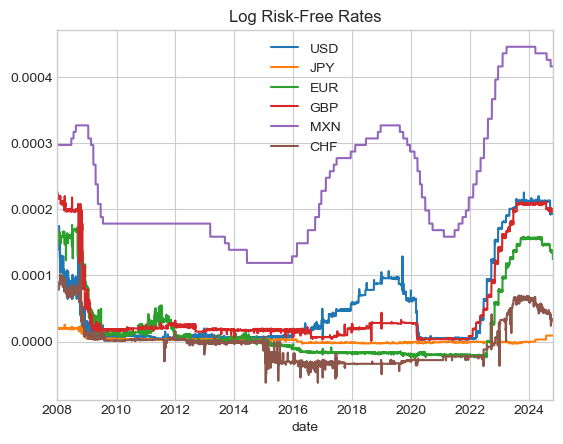

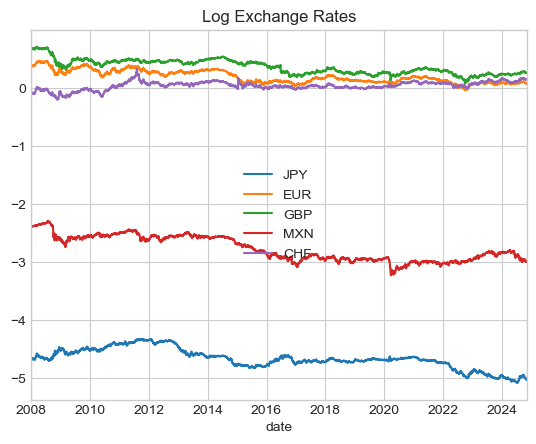

In [15]:
FX_FILE = DATA_PATH + 'fx_rf_data.xlsx'
rf_rates = pmh.read_excel_default(FX_FILE, 
                                 sheet_name='risk-free rates',
                                 index_col='date', parse_dates=True)
rf_rates /= 252   # risk-free rates are originally provided on annualized basis, converting to daily
ex_rates = pmh.read_excel_default(FX_FILE, 
                                 sheet_name='exchange rates',
                                 index_col='date', parse_dates=True)

log_rf_rates = np.log(1 + rf_rates)
log_ex_rates = np.log(ex_rates)

log_rf_rates.plot(title='Log Risk-Free Rates', legend='best')
log_ex_rates.plot(title='Log Exchange Rates', legend='best')

### 3.1 The Static Carry Trade

Define the log return of holding the foreign currency using log values of the risk-free rate and log values of the FX rates:

$$ r^i_{t+1} \equiv s^i_{t+1} - s^i_t + r_{t,t+1} $$

Then the excess log return relative to USD, is expressed as

$$ \tilde{r}^i_{t+1} \equiv s^i_{t+1} - s^i_t + r_{t,t+1}^{f,i} - r_{t,t+1}^{f,\$} $$

For each foreign currency, $i$, calculate the excess log return series, $\tilde{r}_{t+1}$. Report the following stats, (based on the excess log returns.) Annualize them.

1. Mean
2. Volatility
3. Sharpe ratio

What differences do you see across currencies?

In [17]:
spot_returns = log_ex_rates - log_ex_rates.shift(1)
rate_returns = log_rf_rates.drop('USD', axis=1) - log_rf_rates[['USD']].values
xs_log_rets = spot_returns + rate_returns

(pmh.calc_summary_statistics(xs_log_rets, annual_factor=252, provided_excess_returns=True,
                            keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe',])
                            .T.style.format("{:.2%}"))

,JPY,EUR,GBP,MXN,CHF
Annualized Mean,-2.96%,-2.36%,-2.48%,1.31%,0.25%
Annualized Vol,9.91%,9.01%,9.57%,13.00%,10.69%
Annualized Sharpe,-29.82%,-26.24%,-25.97%,10.08%,2.32%


<span style="color:red;">

* JPY, EUR, and GBP excess returns have very similar return profiles. All negative with low vol.
* MXN and CHF provide some excess return, but also demand higher vols

In summary, one should short the JPY, EUR, and GBP rates and long the MXN and CHF rates. 

</span>

### 3.2 Implications for UIP

1. Do any of these stats contradict the (log version) of Uncovered Interest Parity (UIP)?
2. A long position in which foreign currency offered the best Sharpe ratio over the sample?
3. Are there any foreign currencies for which a long position earned a negative excess return (in USD) over the sample?


<span style="color:red;">

**(1)** Recall that UIP states that, in logs, we have
$$ln \mathbb{E}_t[S_{t+1}^i] - s_t^i = r_{t, t+1}^{f, \$} - r_{t, t+1}^{f, i}$$
so we should have excess log returns from 3.1:
$$s_{t+1}^i - s_t + r_{t, t+1}^{f, i} - r_{t, t+1}^{f, \$} = 0$$
Statistically speaking, it appears we are able to reject the null hypothesis that the excess log returns of each of these currencies is equal to zero--refer below. Consequently, this suggests that UIP is violated.

</span>

In [26]:
# 1.
def t_test(x, annual_factor, mu=0, alpha=0.05, two_tailed=True):
    n = len(x)
    t = (np.mean(x) - mu) / (np.std(x) / np.sqrt(n)) * np.sqrt(annual_factor)
    if two_tailed:
        p = 2 * (1 - norm.cdf(np.abs(t)))
    else:
        p = 1 - norm.cdf(np.abs(t))
    if isinstance(x, pd.DataFrame):
        for i, col in enumerate(x.columns):
            if p[i] < alpha:
                print(f"Reject the null hypothesis at the {alpha} level of significance for {col}\
                      \n\tp-value: {p[i]:.4%}")
            else:
                print(f"Fail to reject the null hypothesis at the {alpha} level of significance for {col}\
                      \n\tp-value: {p[i]:.4%}")
    else:
        if p < alpha:
                print(f"Reject the null hypothesis at the {alpha} level of significance\
                      \n\tp-value: {p:.4%}")
        else:
            print(f"Fail to reject the null hypothesis at the {alpha} level of significance\
                  \n\tp-value: {p:.4%}")
    
    return t, p

_, p = t_test(xs_log_rets, annual_factor=252, mu=0, alpha=0.05, two_tailed=True)

Reject the null hypothesis at the 0.05 level of significance for JPY                      
	p-value: 0.0000%
Reject the null hypothesis at the 0.05 level of significance for EUR                      
	p-value: 0.0000%
Reject the null hypothesis at the 0.05 level of significance for GBP                      
	p-value: 0.0000%
Reject the null hypothesis at the 0.05 level of significance for MXN                      
	p-value: 0.0000%
Reject the null hypothesis at the 0.05 level of significance for CHF                      
	p-value: 0.0000%


<span style="color:red;">

**(2)** A long position in MXN offered the best Sharpe in the observed sample period.

**(3)** Yes--JPY, GBP, EUR all seem to provide negative excess return over the sample period.

</span>


### 3.3 Predicting FX

For each foreign currency, test whether interest-rate differentials can predict growth in the foreign-exchange rate. Do this by estimating the following forecasting regression:

$$ s^i_{t+1} - s^i_t = \alpha^i + \beta^i \left( r_{f,\$_{t,t+1}} - r_{f,it,t+1} \right) + \epsilon^i_{t+1} $$

where $r_{f,i}$ denotes the risk-free rate of currency $i$, and $s^i$ denotes the FX rate for currency $i$. Again, note that both $r_{f,\$_{t,t+1}}$ and $s_t$ are determined at time $t$.

1. Make a table with columns corresponding to a different currency regression. Report the regression estimates $\alpha^i$ and $\beta^i$ in the first two rows. Report the $R^2$ stat in the third row.

2. Suppose the foreign risk-free rate increases relative to the US rate.

    (a) For which foreign currencies would we predict a relative strengthening of the USD in the following period?

    (b) For which currencies would we predict relative weakening of the USD in the following period?

    (c) This FX predictability is strongest in the case of which foreign currency?



### 3.4 The Dynamic Carry Trade

Use this to write $ E_t \left[ \tilde{r}^i_{t+1} \right] $ as a function of the interest-rate differential as well as $\alpha$ and $\beta$ from this FX regression.

$$ E_t \left[ s^i_{t+1} - s^i_t \right] = \alpha + \beta \left( r_{f,\$_{t,t+1}} - r_{f,it,t+1} \right) $$

Then use the definition of excess (log) returns on FX:

$$ \tilde{r}^i_{t+1} = s^i_{t+1} - s^i_t - \left( r_{f,\$_{t,t+1}} - r_{f,it,t+1} \right) $$

Rearranging, this implies the following forecast for excess log returns:

$$ E_t \left[ \tilde{r}^i_{t+1} \right] = \alpha + (\beta - 1) \left( r_{f,\$_{t,t+1}} - r_{f,it,t+1} \right) $$

1. Use your regression estimates from Problem 3 along with the formula above to calculate the fraction of months for which the estimated FX risk premium is positive. That is, for each $i$, calculate how often in the time-series we have:

    $$ E_t \left[ \tilde{r}^i_{t+1} \right] > 0 $$

2. Which currencies most consistently have a positive FX risk premium? And for which currencies does the FX risk premium most often go negative?

3. Explain how we could use these conditional risk premia to improve the static carry trade returns calculated in Problem 1.
